Home Loan Approval

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-loan-approval/loan_sanction_test.csv
/kaggle/input/home-loan-approval/loan_sanction_train.csv


In [2]:
df_train=pd.read_csv("/kaggle/input/home-loan-approval/loan_sanction_train.csv")
df_test=pd.read_csv("/kaggle/input/home-loan-approval/loan_sanction_test.csv")

In [3]:
print("\n Data Information:")
df_train.info()
print("Data Description: \n" , df_train.describe())
print("\n Missing Values Check:")
df_train.isnull().sum()


 Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
Data Description: 
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df_train.drop('Loan_ID', axis=1, inplace=True)

In [5]:
# Fill categorical columns with mode
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)

# Fill numerical columns
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)  # median due to outliers
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)


/tmp/ipykernel_36/4088709158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
/tmp/ipykernel_36/4088709158.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [6]:
print("\n Missing Values Check Again:")
df_train.isnull().sum()


 Missing Values Check Again:


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


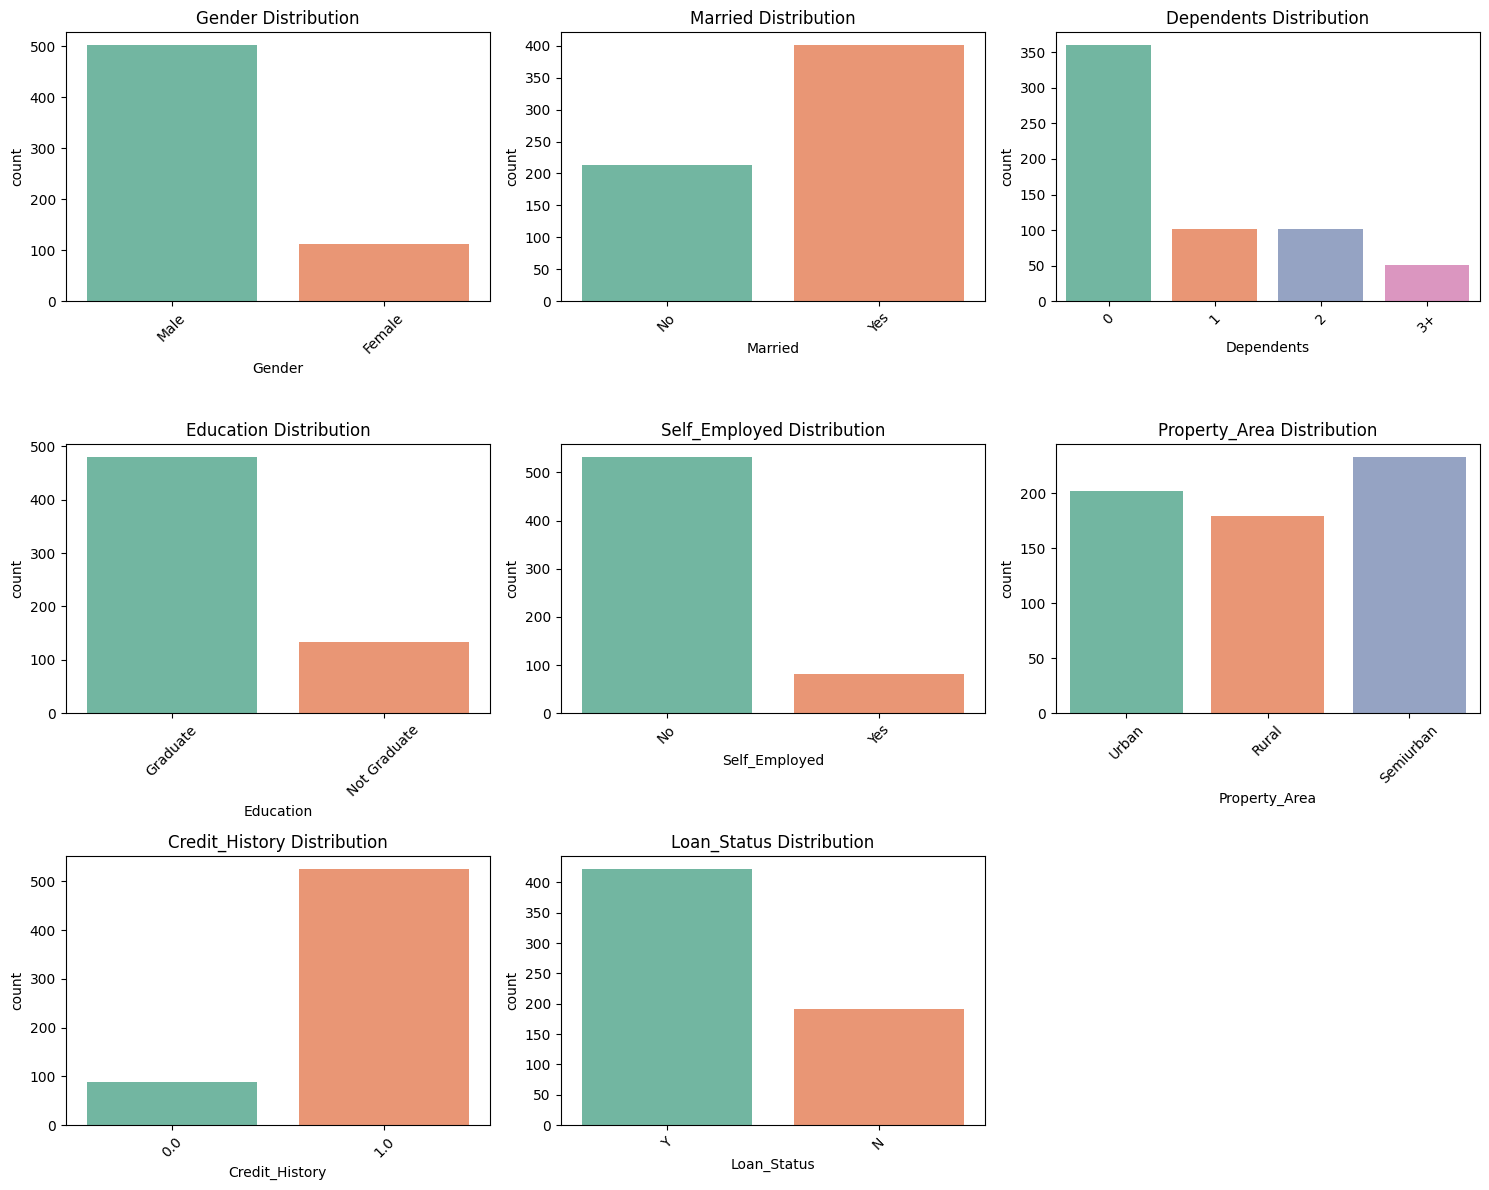

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_train, x=col, palette="Set2")
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


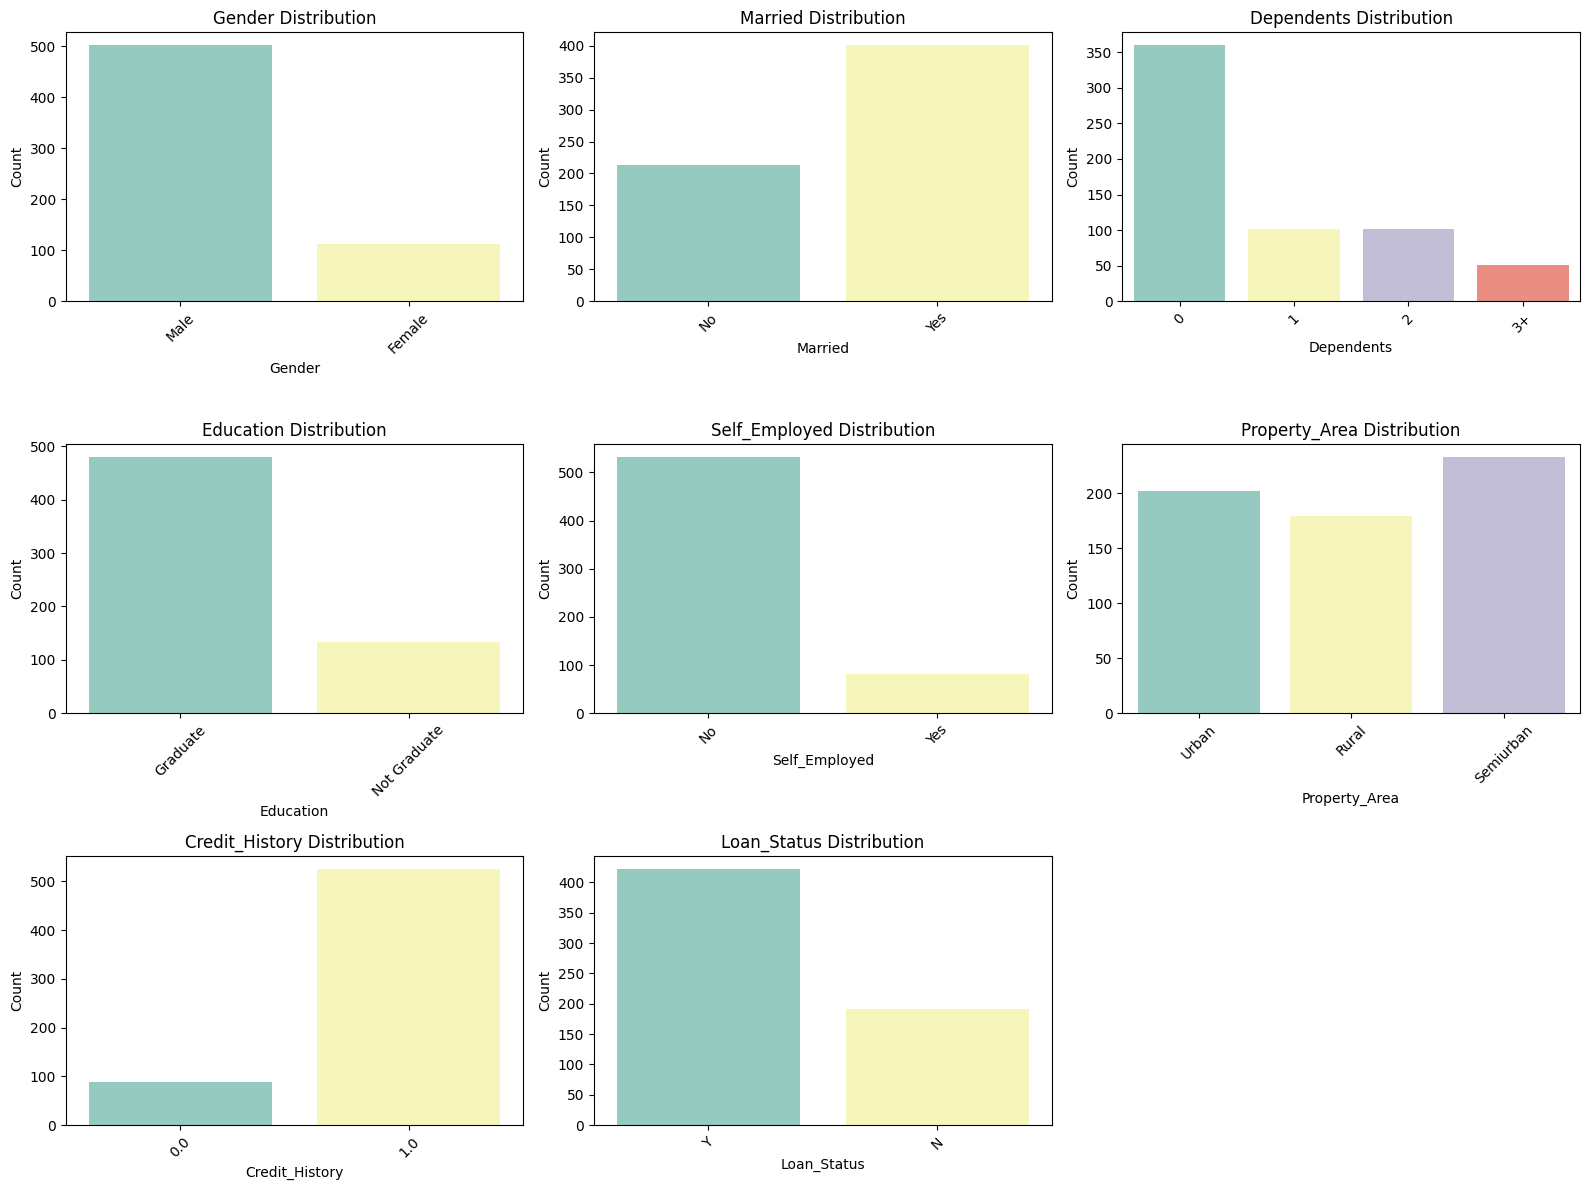

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_train, x=col, palette="Set3")
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


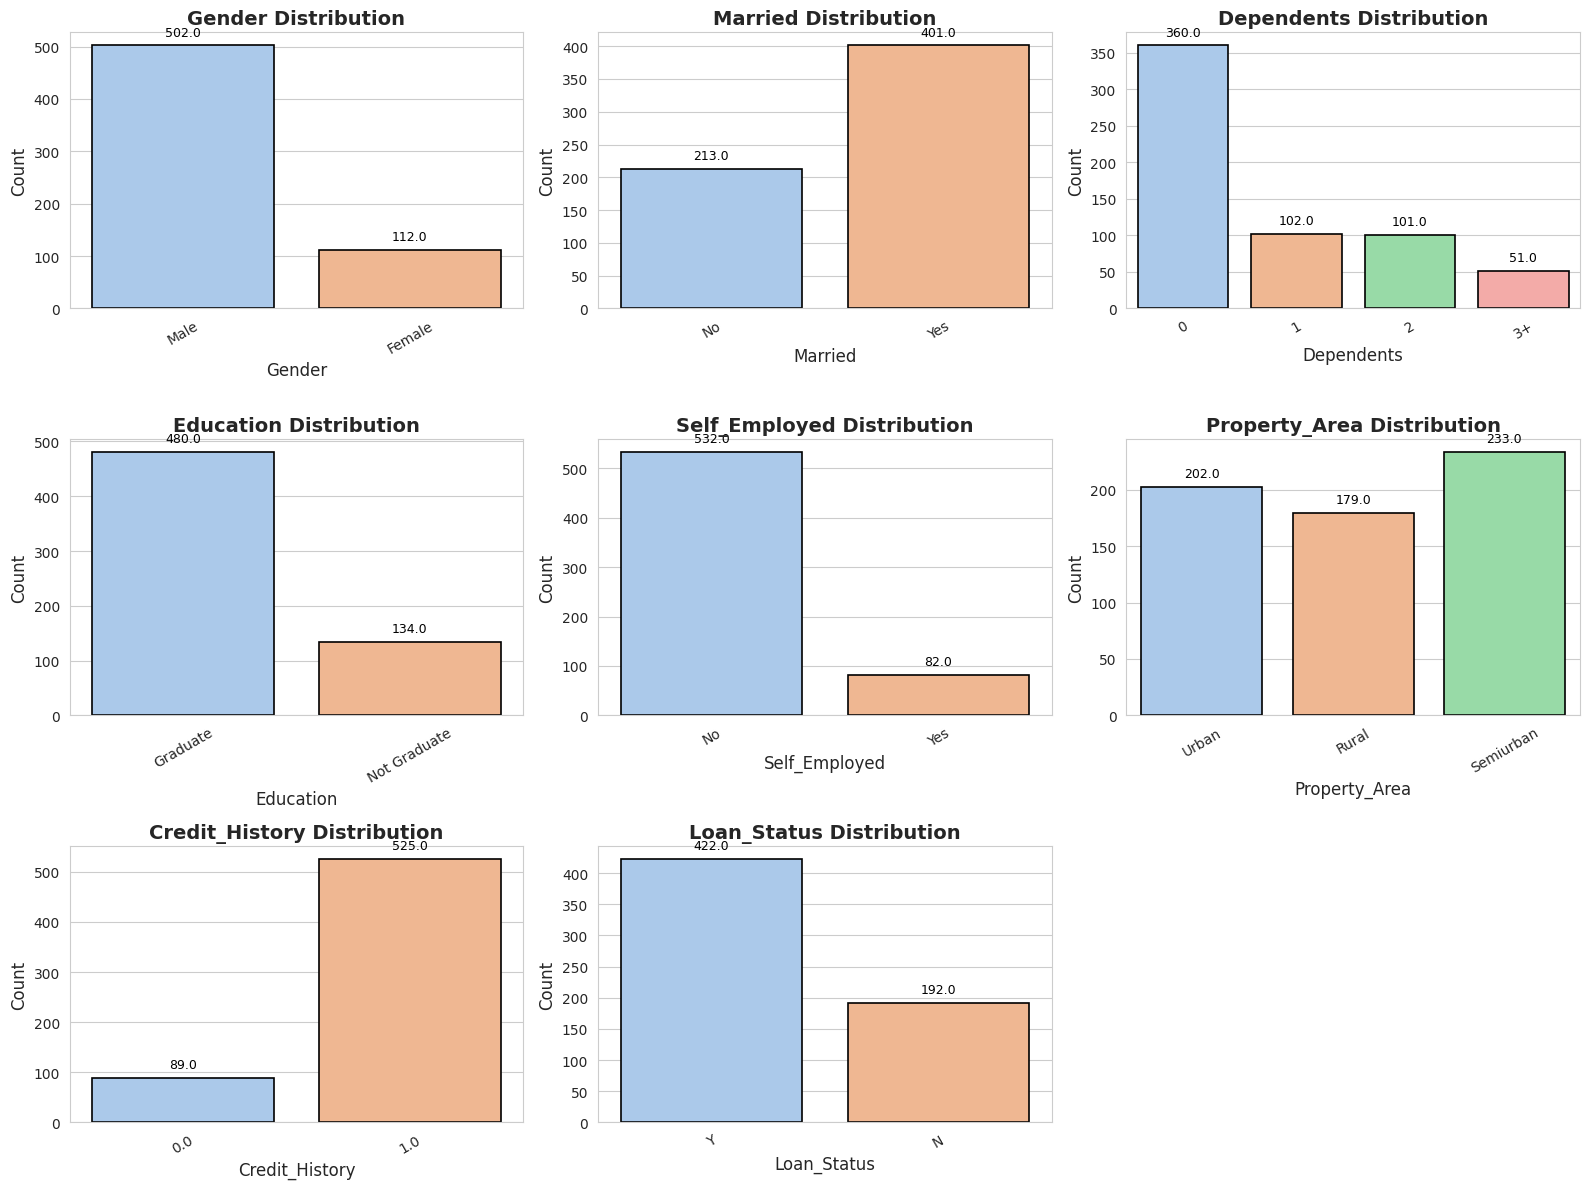

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")  # Clean background with grid
sns.set_palette("pastel")   # Softer pastel colors
plt.figure(figsize=(16, 12))

categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(data=df_train, x=col, edgecolor='black', linewidth=1.2)
    plt.title(f'{col} Distribution', fontsize=14, weight='bold')
    plt.xticks(rotation=30, fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

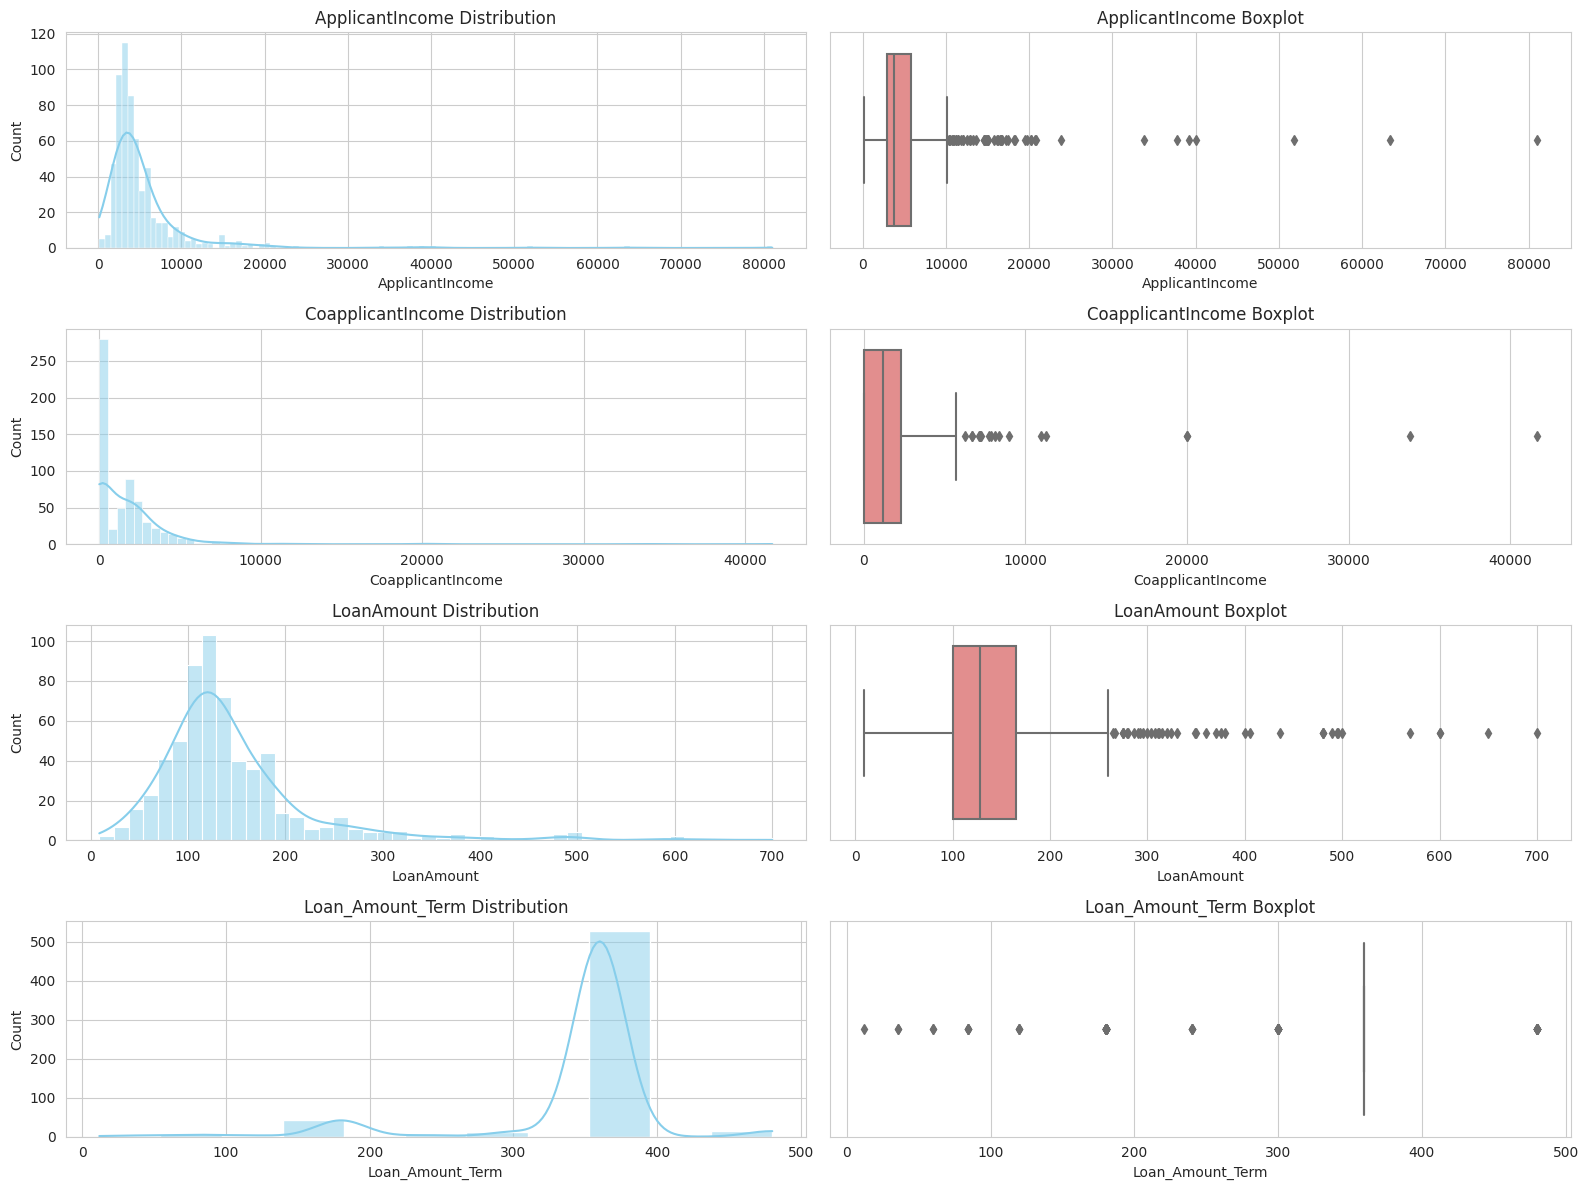

In [11]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.figure(figsize=(16, 12))

# Histograms
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, 2*i - 1)
    sns.histplot(df_train[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    
    # Boxplots
    plt.subplot(4, 2, 2*i)
    sns.boxplot(x=df_train[col], color='lightcoral')
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()


Bivariate Analysis

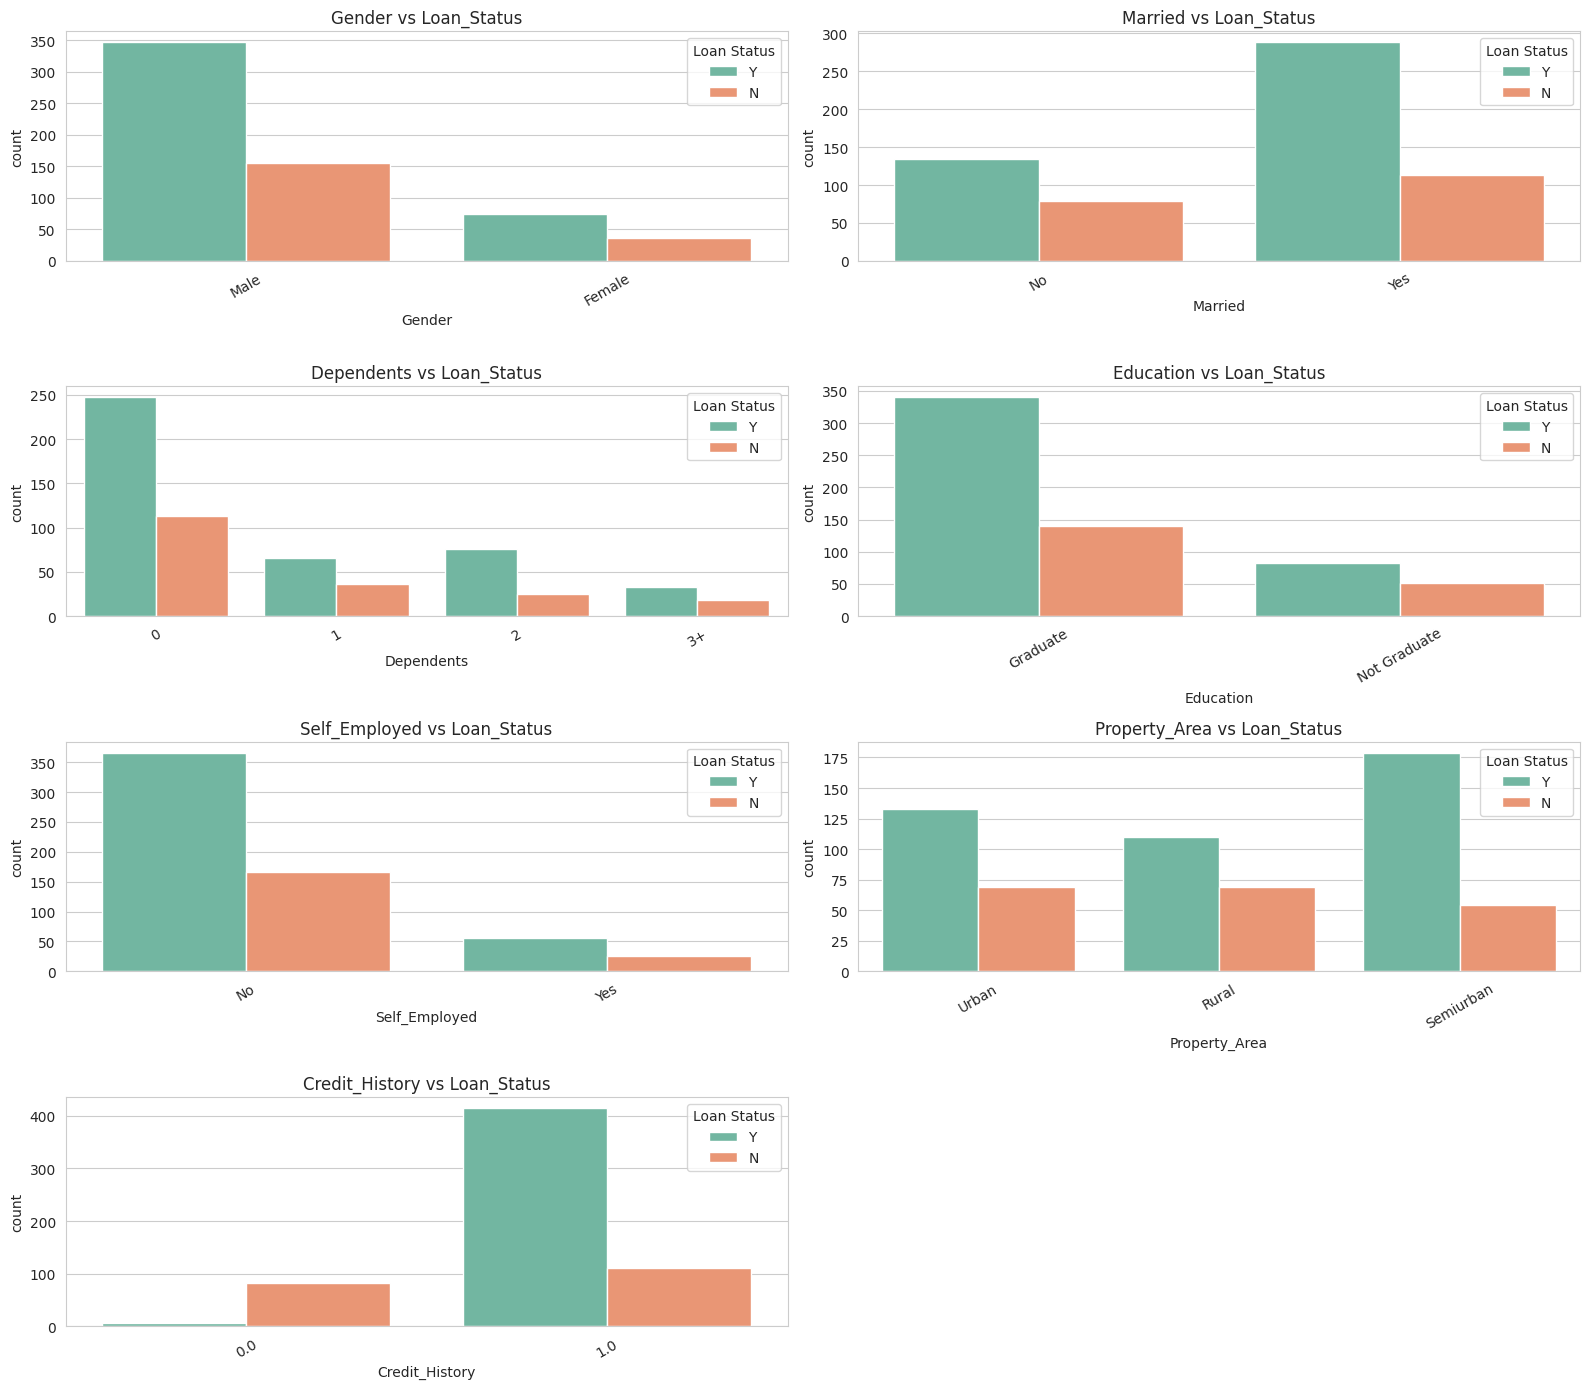

In [12]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'Property_Area', 'Credit_History']

plt.figure(figsize=(16, 14))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df_train, x=col, hue='Loan_Status', palette='Set2')
    plt.title(f'{col} vs Loan_Status')
    plt.xticks(rotation=30)
    plt.legend(title='Loan Status')

plt.tight_layout()
plt.show()


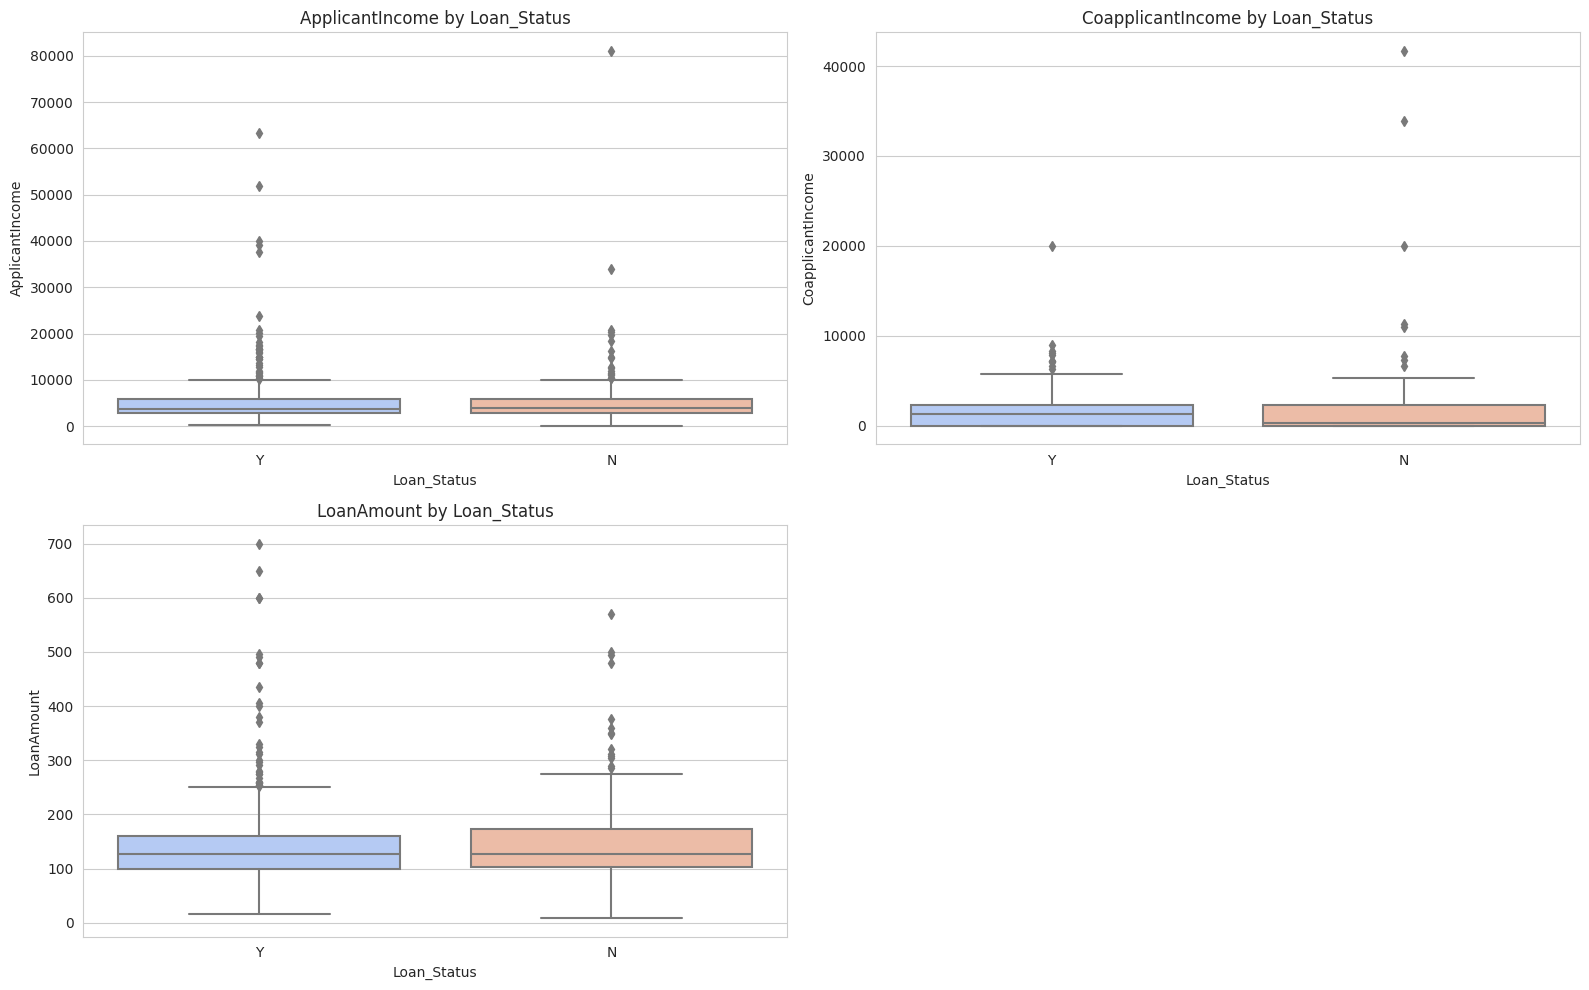

In [13]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_train, x='Loan_Status', y=col, palette='coolwarm')
    plt.title(f'{col} by Loan_Status')

plt.tight_layout()
plt.show()


In [14]:
# Make a copy of the dataset
df_encoded = df_train.copy()

# -----------------------
# 1. Map binary categorical columns
# -----------------------

# Mapping with .map() and using .fillna(-1) to handle unknown values (e.g., test data has "Other" or invalid input)
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 1, 'Female': 0}).fillna(-1)
df_encoded['Married'] = df_encoded['Married'].map({'Yes': 1, 'No': 0}).fillna(-1)
df_encoded['Education'] = df_encoded['Education'].map({'Graduate': 1, 'Not Graduate': 0}).fillna(-1)
df_encoded['Self_Employed'] = df_encoded['Self_Employed'].map({'Yes': 1, 'No': 0}).fillna(-1)

# Target column: Y → 1, N → 0
df_encoded['Loan_Status'] = df_encoded['Loan_Status'].map({'Y': 1, 'N': 0})

# -----------------------
# 2. One-Hot Encode Multi-Class Columns
# -----------------------

# Apply One-Hot Encoding to 'Dependents' and 'Property_Area'
# drop_first=True avoids dummy variable trap
df_encoded = pd.get_dummies(df_encoded, columns=['Dependents', 'Property_Area'], drop_first=True)

# -----------------------
# 3. Final Check
# -----------------------

# Optional: print to verify encoded columns
print(df_encoded.head())

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       1        0          1              0             5849   
1       1        1          1              0             4583   
2       1        1          1              1             3000   
3       1        1          0              0             2583   
4       1        0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Loan_Status  Dependents_1  Dependents_2  Dependents_3+  \
0            1         False         False          False   
1            0          True         False          False   
2    

In [15]:
# Convert all boolean columns to int (0/1)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes('bool').columns})


In [16]:
print(df_encoded.head())

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       1        0          1              0             5849   
1       1        1          1              0             4583   
2       1        1          1              1             3000   
3       1        1          0              0             2583   
4       1        0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Loan_Status  Dependents_1  Dependents_2  Dependents_3+  \
0            1             0             0              0   
1            0             1             0              0   
2    

In [17]:
from sklearn.preprocessing import StandardScaler

# Create a copy for scaling
df_scaled = df_encoded.copy()

# Define features to scale
scale_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaler to selected columns
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])


In [18]:
df_scaled

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1,0,0,0,0,1
1,1,1,1,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,1,0,0,0,0
2,1,1,1,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,0,0,0,0,1
3,1,1,0,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1,0,0,0,0,1
4,1,0,1,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,-0.410130,-0.554487,-0.889500,0.273231,1.0,1,0,0,0,0,0
610,1,1,1,0,-0.212557,-0.554487,-1.258378,-2.522836,1.0,1,0,0,1,0,0
611,1,1,1,0,0.437174,-0.472404,1.276168,0.273231,1.0,1,1,0,0,0,1
612,1,1,1,0,0.357064,-0.554487,0.490816,0.273231,1.0,1,0,1,0,0,1


In [19]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_scaled.drop('Loan_Status', axis=1)
y = df_scaled['Loan_Status']

# Split into train and validation sets (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 6.1 MB/s eta 0:00:00:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [21]:
from imblearn.over_sampling import SMOTE

# After splitting into X_train, X_val, y_train, y_val
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [22]:
pd.Series(y_train_bal).value_counts(normalize=True)


Loan_Status
1    0.5
0    0.5
Name: proportion, dtype: float64

Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on validation set
y_pred_dt = dt_model.predict(X_val)

# Evaluation
print("🔍 Decision Tree Evaluation\n")
print("Accuracy:", accuracy_score(y_val, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_val, y_pred_dt))


🔍 Decision Tree Evaluation

Accuracy: 0.7317073170731707

Confusion Matrix:
 [[24 14]
 [19 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.63      0.59        38
           1       0.82      0.78      0.80        85

    accuracy                           0.73       123
   macro avg       0.69      0.70      0.70       123
weighted avg       0.74      0.73      0.74       123



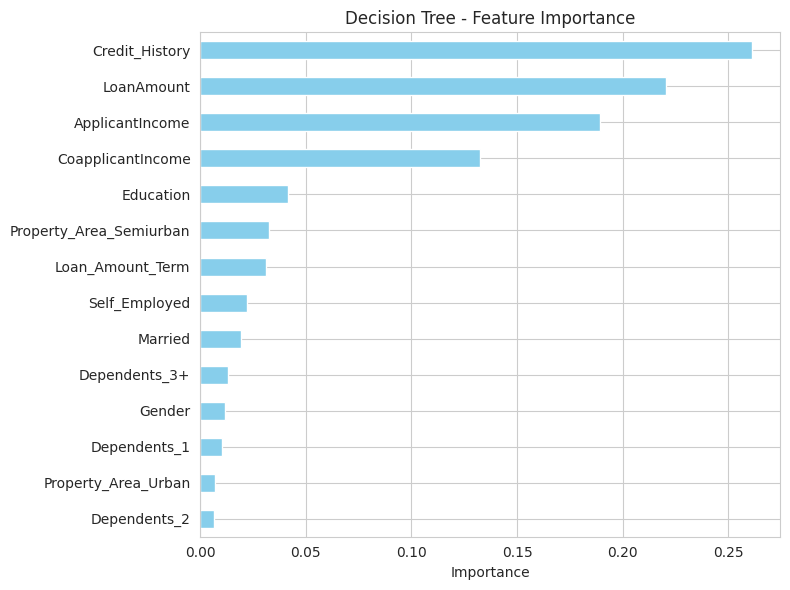

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the decision tree model
dt_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns)

# Plot
dt_importance.sort_values().plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title('Decision Tree - Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_val)

# Evaluation
print("🌲 Random Forest Evaluation\n")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))


🌲 Random Forest Evaluation

Accuracy: 0.8292682926829268

Confusion Matrix:
 [[23 15]
 [ 6 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.84      0.93      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.77      0.78       123
weighted avg       0.83      0.83      0.82       123



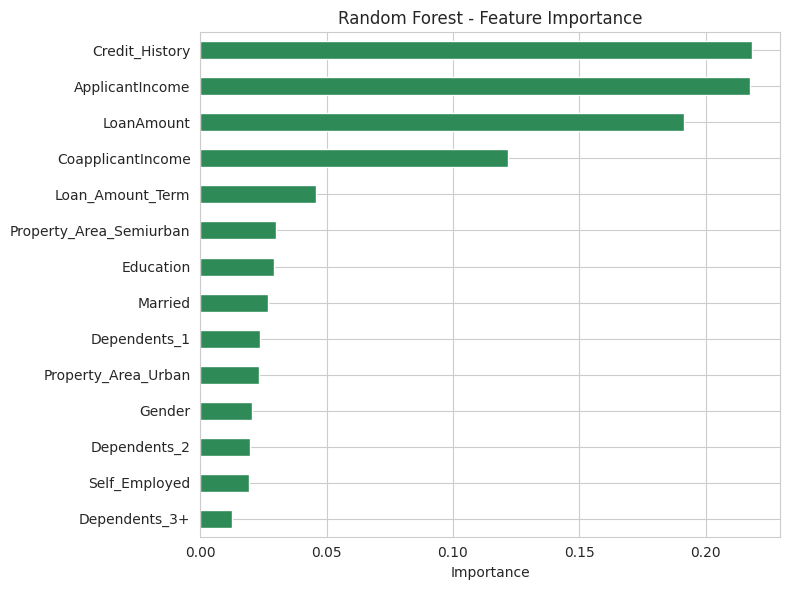

In [26]:
# Get feature importances from the random forest model
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Plot
rf_importance.sort_values().plot(kind='barh', figsize=(8, 6), color='seagreen')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train
knn_model = KNeighborsClassifier(n_neighbors=5)  # 5 is default, can be tuned later
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_val)

# Evaluation
print("🤝 kNN Evaluation\n")
print("Accuracy:", accuracy_score(y_val, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_val, y_pred_knn))


🤝 kNN Evaluation

Accuracy: 0.8130081300813008

Confusion Matrix:
 [[19 19]
 [ 4 81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.50      0.62        38
           1       0.81      0.95      0.88        85

    accuracy                           0.81       123
   macro avg       0.82      0.73      0.75       123
weighted avg       0.81      0.81      0.80       123



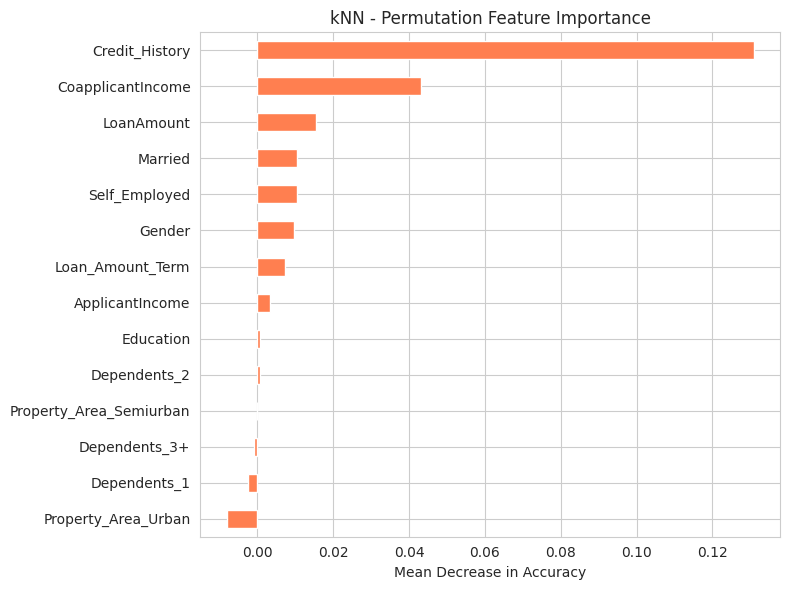

In [28]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
knn_perm = permutation_importance(knn_model, X_val, y_val, n_repeats=10, random_state=42)

# Convert to Series and plot
knn_importance = pd.Series(knn_perm.importances_mean, index=X_train.columns)
knn_importance.sort_values().plot(kind='barh', figsize=(8, 6), color='coral')
plt.title('kNN - Permutation Feature Importance')
plt.xlabel('Mean Decrease in Accuracy')
plt.tight_layout()
plt.show()


XGB

In [29]:
import xgboost as xgb

# Initialize and train
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_val)

# Evaluation
print("⚡ XGBoost Evaluation\n")
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_xgb))


⚡ XGBoost Evaluation

Accuracy: 0.7886178861788617

Confusion Matrix:
 [[24 14]
 [12 73]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.63      0.65        38
           1       0.84      0.86      0.85        85

    accuracy                           0.79       123
   macro avg       0.75      0.75      0.75       123
weighted avg       0.79      0.79      0.79       123



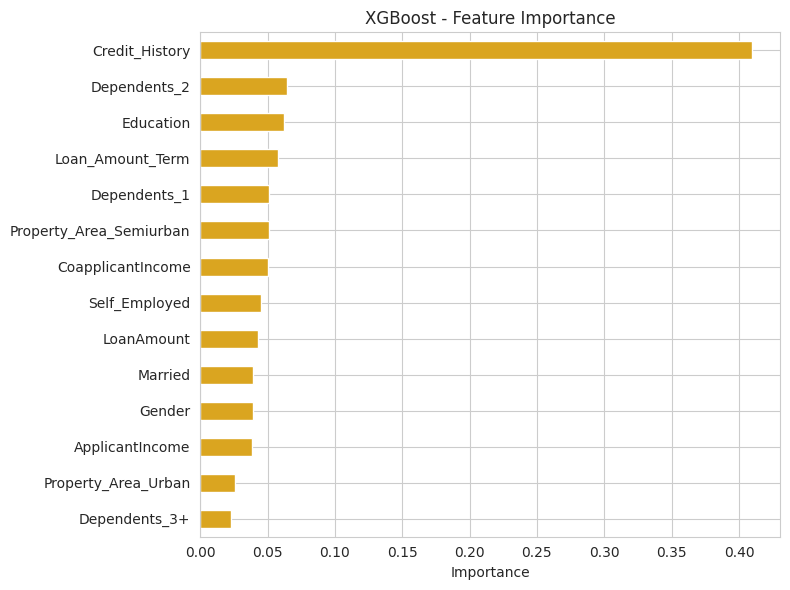

In [30]:
# Get feature importances from the XGBoost model
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Plot
xgb_importance.sort_values().plot(kind='barh', figsize=(8, 6), color='goldenrod')
plt.title('XGBoost - Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


Feature importance of all the 4 models - DT, RF, KNN, XGB together

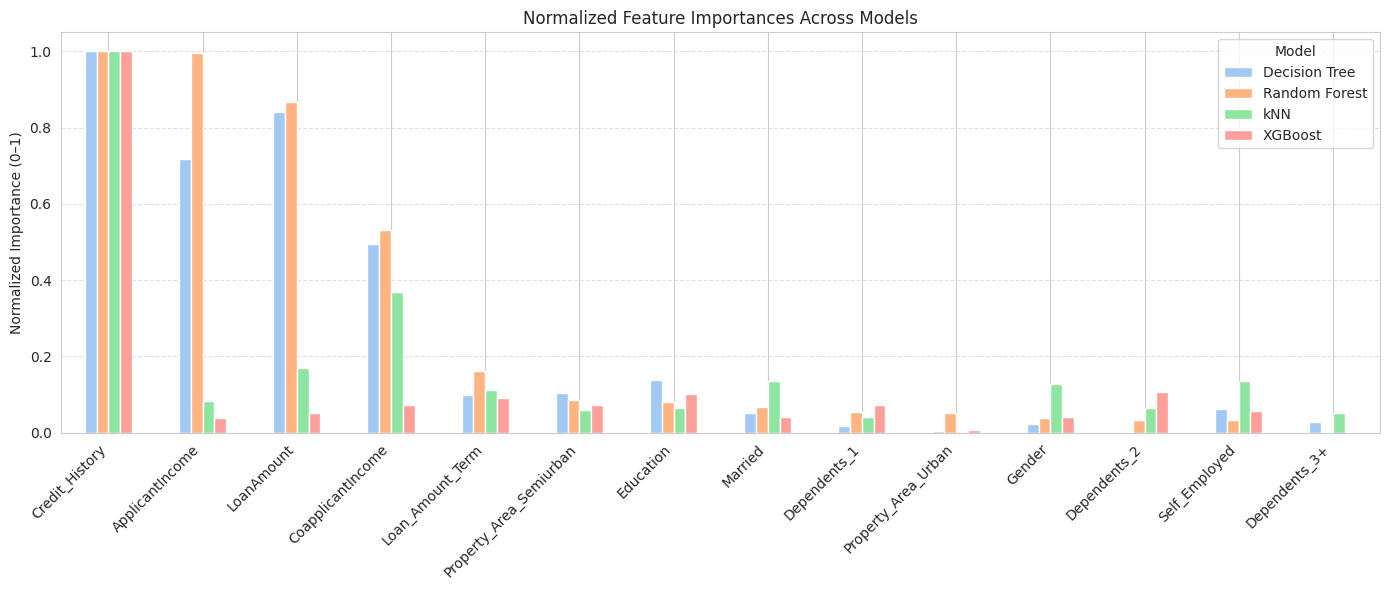

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. Extract importances (skip Loan_Status if present)
features = X_train.columns

# Get importance for each model
dt_imp = pd.Series(dt_model.feature_importances_, index=features, name='Decision Tree')
rf_imp = pd.Series(rf_model.feature_importances_, index=features, name='Random Forest')
xgb_imp = pd.Series(xgb_model.feature_importances_, index=features, name='XGBoost')

# For kNN: permutation importance
from sklearn.inspection import permutation_importance
knn_perm = permutation_importance(knn_model, X_val, y_val, n_repeats=10, random_state=42)
knn_imp = pd.Series(knn_perm.importances_mean, index=features, name='kNN')

# 2. Combine into one DataFrame
imp_df = pd.concat([dt_imp, rf_imp, knn_imp, xgb_imp], axis=1)

# 3. Normalize for comparison (0–1 scale)
scaler = MinMaxScaler()
imp_df_scaled = pd.DataFrame(scaler.fit_transform(imp_df), columns=imp_df.columns, index=imp_df.index)

# 4. Plot grouped bar chart
imp_df_scaled.sort_values(by='Random Forest', ascending=False).plot(kind='bar', figsize=(14, 6))
plt.title('Normalized Feature Importances Across Models')
plt.ylabel('Normalized Importance (0–1)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(title='Model')
plt.show()


Classification Report Comparison

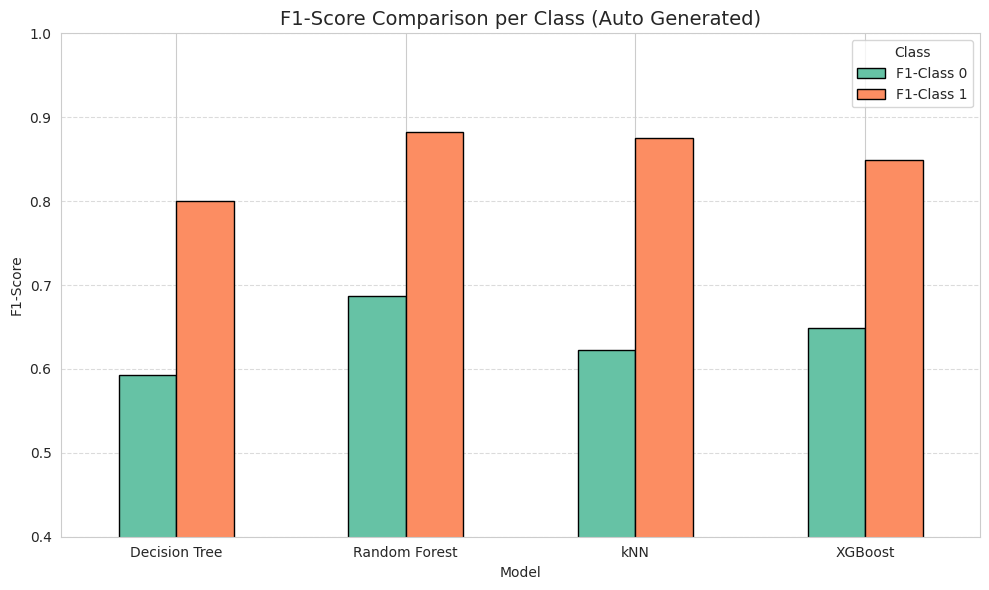

In [32]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# List of models and their predictions
models = {
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'kNN': y_pred_knn,
    'XGBoost': y_pred_xgb
}

# Extract f1-score for each class
f1_scores = {}

for name, y_pred in models.items():
    report = classification_report(y_val, y_pred, output_dict=True)
    f1_scores[name] = {
        'F1-Class 0': report['0']['f1-score'],
        'F1-Class 1': report['1']['f1-score']
    }

# Convert to DataFrame
df_f1 = pd.DataFrame(f1_scores).T.reset_index().rename(columns={'index': 'Model'})

# Plot
df_f1.set_index('Model').plot(kind='bar', figsize=(10, 6), color=['#66c2a5', '#fc8d62'], edgecolor='black')
plt.title('F1-Score Comparison per Class (Auto Generated)', fontsize=14)
plt.ylabel('F1-Score')
plt.ylim(0.4, 1.0)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Class')
plt.tight_layout()
plt.show()


In [33]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# 1. Store model predictions
model_predictions = {
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'kNN': y_pred_knn,
    'XGBoost': y_pred_xgb
}

# 2. Collect results
results = []

for model_name, y_pred in model_predictions.items():
    report = classification_report(y_val, y_pred, output_dict=True)
    accuracy = accuracy_score(y_val, y_pred)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision_0': report['0']['precision'],
        'Recall_0': report['0']['recall'],
        'F1_0': report['0']['f1-score'],
        'Precision_1': report['1']['precision'],
        'Recall_1': report['1']['recall'],
        'F1_1': report['1']['f1-score']
    })

# 3. Create results DataFrame
df_results = pd.DataFrame(results)
df_results.set_index('Model', inplace=True)
print(df_results)  # optional: view summary table


               Accuracy  Precision_0  Recall_0      F1_0  Precision_1  \
Model                                                                   
Decision Tree  0.731707     0.558140  0.631579  0.592593     0.825000   
Random Forest  0.829268     0.793103  0.605263  0.686567     0.840426   
kNN            0.813008     0.826087  0.500000  0.622951     0.810000   
XGBoost        0.788618     0.666667  0.631579  0.648649     0.839080   

               Recall_1      F1_1  
Model                              
Decision Tree  0.776471  0.800000  
Random Forest  0.929412  0.882682  
kNN            0.952941  0.875676  
XGBoost        0.858824  0.848837  


<Figure size 1000x600 with 0 Axes>

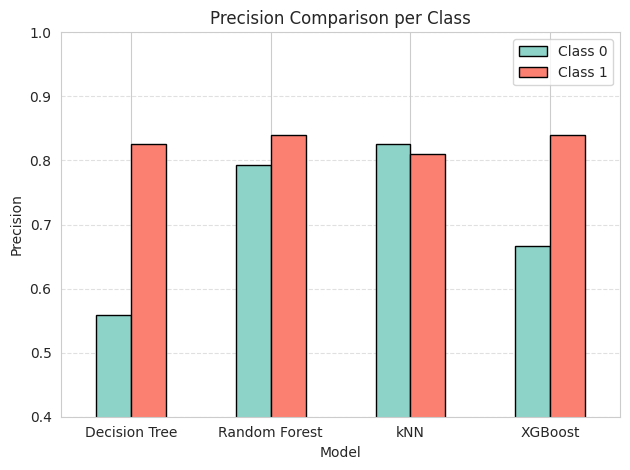

<Figure size 1000x600 with 0 Axes>

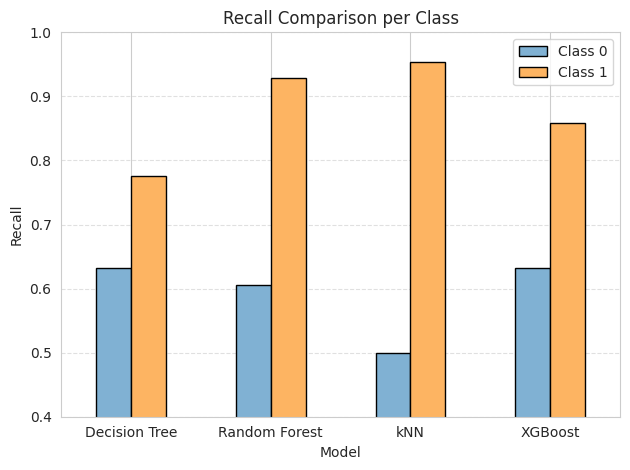

<Figure size 1000x600 with 0 Axes>

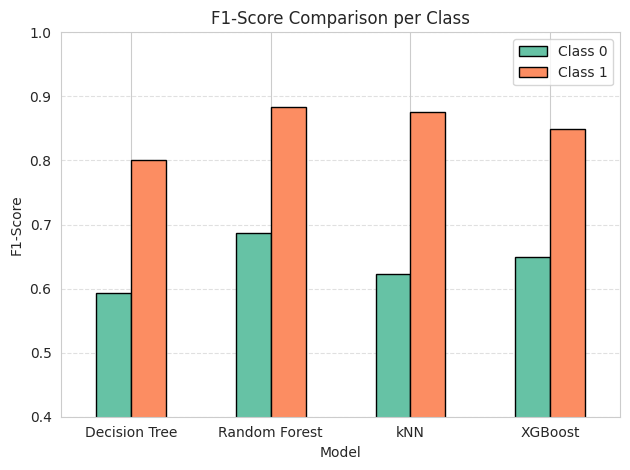

In [34]:
# Function to plot metric comparison
def plot_metric(metric_prefix, title, color1, color2):
    plt.figure(figsize=(10, 6))
    df_results[[f'{metric_prefix}_0', f'{metric_prefix}_1']].plot(
        kind='bar',
        color=[color1, color2],
        edgecolor='black'
    )
    plt.title(f'{title} Comparison per Class')
    plt.ylabel(title)
    plt.ylim(0.4, 1.0)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(['Class 0', 'Class 1'])
    plt.tight_layout()
    plt.show()

# Plot all three metrics
plot_metric('Precision', 'Precision', '#8dd3c7', '#fb8072')
plot_metric('Recall', 'Recall', '#80b1d3', '#fdb462')
plot_metric('F1', 'F1-Score', '#66c2a5', '#fc8d62')


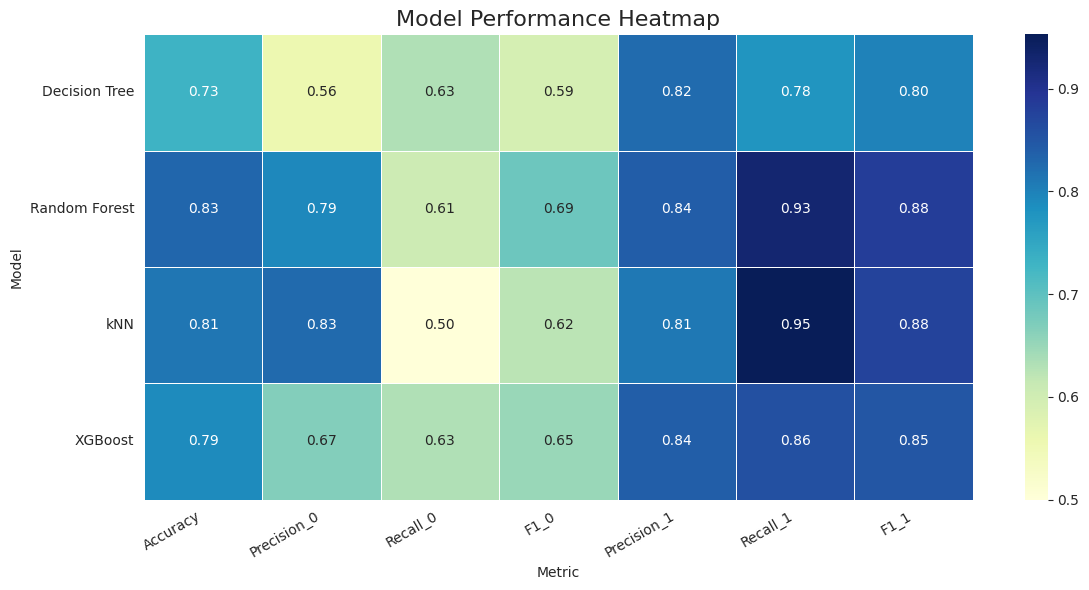

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.heatmap(df_results, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, linecolor='white')

plt.title("Model Performance Heatmap", fontsize=16)
plt.ylabel("Model")
plt.xlabel("Metric")
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Hyperparameter Tuning

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create base model
rf_base = RandomForestClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all processors
    verbose=2,
    scoring='accuracy'  # Or 'f1' or 'roc_auc' if imbalanced
)

# Fit
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

Found the best hyperparameters:
{
  'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 300
}


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Train the best model with tuned parameters
best_rf = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)

best_rf.fit(X_train_bal, y_train_bal)

# Predict and evaluate on validation set
y_pred_rf_best = best_rf.predict(X_val)

print("🔍 Random Forest (Tuned) Evaluation\n")
print("Accuracy:", accuracy_score(y_val, y_pred_rf_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_rf_best))
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf_best))


🔍 Random Forest (Tuned) Evaluation

Accuracy: 0.8048780487804879

Confusion Matrix:
 [[25 13]
 [11 74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.68        38
           1       0.85      0.87      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.76      0.77       123
weighted avg       0.80      0.80      0.80       123



PreProcessing and cleaning test data

In [38]:
# Make a copy to keep original test data intact
df_test_cleaned = df_test.copy()

# 🔹 Step 1: Drop 'Loan_ID' column (not used for prediction)
df_test_cleaned.drop('Loan_ID', axis=1, inplace=True)

# 🔹 Step 2: Handle missing values (same logic as train set)
df_test_cleaned['Gender'] = df_test_cleaned['Gender'].fillna('Male')
df_test_cleaned['Married'] = df_test_cleaned['Married'].fillna('Yes')
df_test_cleaned['Dependents'] = df_test_cleaned['Dependents'].fillna('0')
df_test_cleaned['Self_Employed'] = df_test_cleaned['Self_Employed'].fillna('No')
df_test_cleaned['LoanAmount'] = df_test_cleaned['LoanAmount'].fillna(df_test_cleaned['LoanAmount'].median())
df_test_cleaned['Loan_Amount_Term'] = df_test_cleaned['Loan_Amount_Term'].fillna(df_test_cleaned['Loan_Amount_Term'].mode()[0])
df_test_cleaned['Credit_History'] = df_test_cleaned['Credit_History'].fillna(1.0)

# 🔹 Step 3: Encode categorical variables manually (same mapping as train)
gender_map = {'Male': 1, 'Female': 0}
married_map = {'Yes': 1, 'No': 0}
education_map = {'Graduate': 1, 'Not Graduate': 0}
self_employed_map = {'Yes': 1, 'No': 0}

df_test_cleaned['Gender'] = df_test_cleaned['Gender'].map(gender_map)
df_test_cleaned['Married'] = df_test_cleaned['Married'].map(married_map)
df_test_cleaned['Education'] = df_test_cleaned['Education'].map(education_map)
df_test_cleaned['Self_Employed'] = df_test_cleaned['Self_Employed'].map(self_employed_map)

# 🔹 Step 4: Encode 'Dependents' using dummy columns
df_test_cleaned['Dependents_1'] = df_test_cleaned['Dependents'] == '1'
df_test_cleaned['Dependents_2'] = df_test_cleaned['Dependents'] == '2'
df_test_cleaned['Dependents_3+'] = df_test_cleaned['Dependents'].isin(['3+', '3'])
df_test_cleaned.drop('Dependents', axis=1, inplace=True)

# 🔹 Step 5: One-hot encode 'Property_Area' (drop_first=True to match train)
df_test_cleaned = pd.get_dummies(df_test_cleaned, columns=['Property_Area'], drop_first=True)


In [39]:
# Predict loan status using the best model
test_preds_binary = best_rf.predict(df_test_cleaned)

# Convert 0/1 to 'Y'/'N'
test_preds_label = ['Y' if p == 1 else 'N' for p in test_preds_binary]

# Create submission DataFrame
submission_df = df_test[['Loan_ID']].copy()
submission_df['Loan_Status'] = test_preds_label

# Show sample
print(submission_df.head())


    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           N

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_d